In [1]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
record = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/session_record.csv',index_col=0)

In [3]:
record.shape

(793, 16)

## Extract sessions

In [39]:
K7 = record[((record['Mouse ID']=='K7') & (record['p(high Port)'] > 0))].copy()
K9 = record[((record['Mouse ID']=='K9') & (record['p(high Port)'] > 0))].copy()
K13 = record[((record['Mouse ID']=='K13') & (record['p(high Port)'] > 0))].copy()
K11 = record[((record['Mouse ID']=='K11') & (record['p(high Port)'] > 0))].copy()
#K13 = record[((record['Mouse ID']=='K13') & (record['p(high Port)'] > 0))].copy()
#K13 = record[((record['Mouse ID']=='K13') & (record['p(high Port)'] > 0))].copy()

q43_ = record[(((record['Mouse ID']=='q43') |(record['Mouse ID']=='Q43')) & (record['p(high Port)'] > 0))].copy()
q45_ = record[(((record['Mouse ID']=='q45') |(record['Mouse ID']=='Q45')) & (record['p(high Port)'] > 0))].copy()
K1_ = record[((record['Mouse ID']=='K1') & (record['p(high Port)'] > 0))].copy()
K1 = K1_.loc[543:].copy()
q43 = q43_.loc[623:].copy()
q45 = q45_.loc[644:].copy()

mice = [K7,K9,K13,K1,q43,q45]

In [2]:
for i in range(5):
    print(i)

0
1
2
3
4


In [11]:
mice_names = ['henry','harry','ken']

'''
for i in mice_names:
    print(i)
    
for i in range(len(mice_names)):
    print(i)
    print(mice_names[i])
'''
   
for i,ele in enumerate(mice_names):
    print(i)
    print(ele)

0
henry
1
harry
2
ken


In [9]:
mice

NameError: name 'mice' is not defined

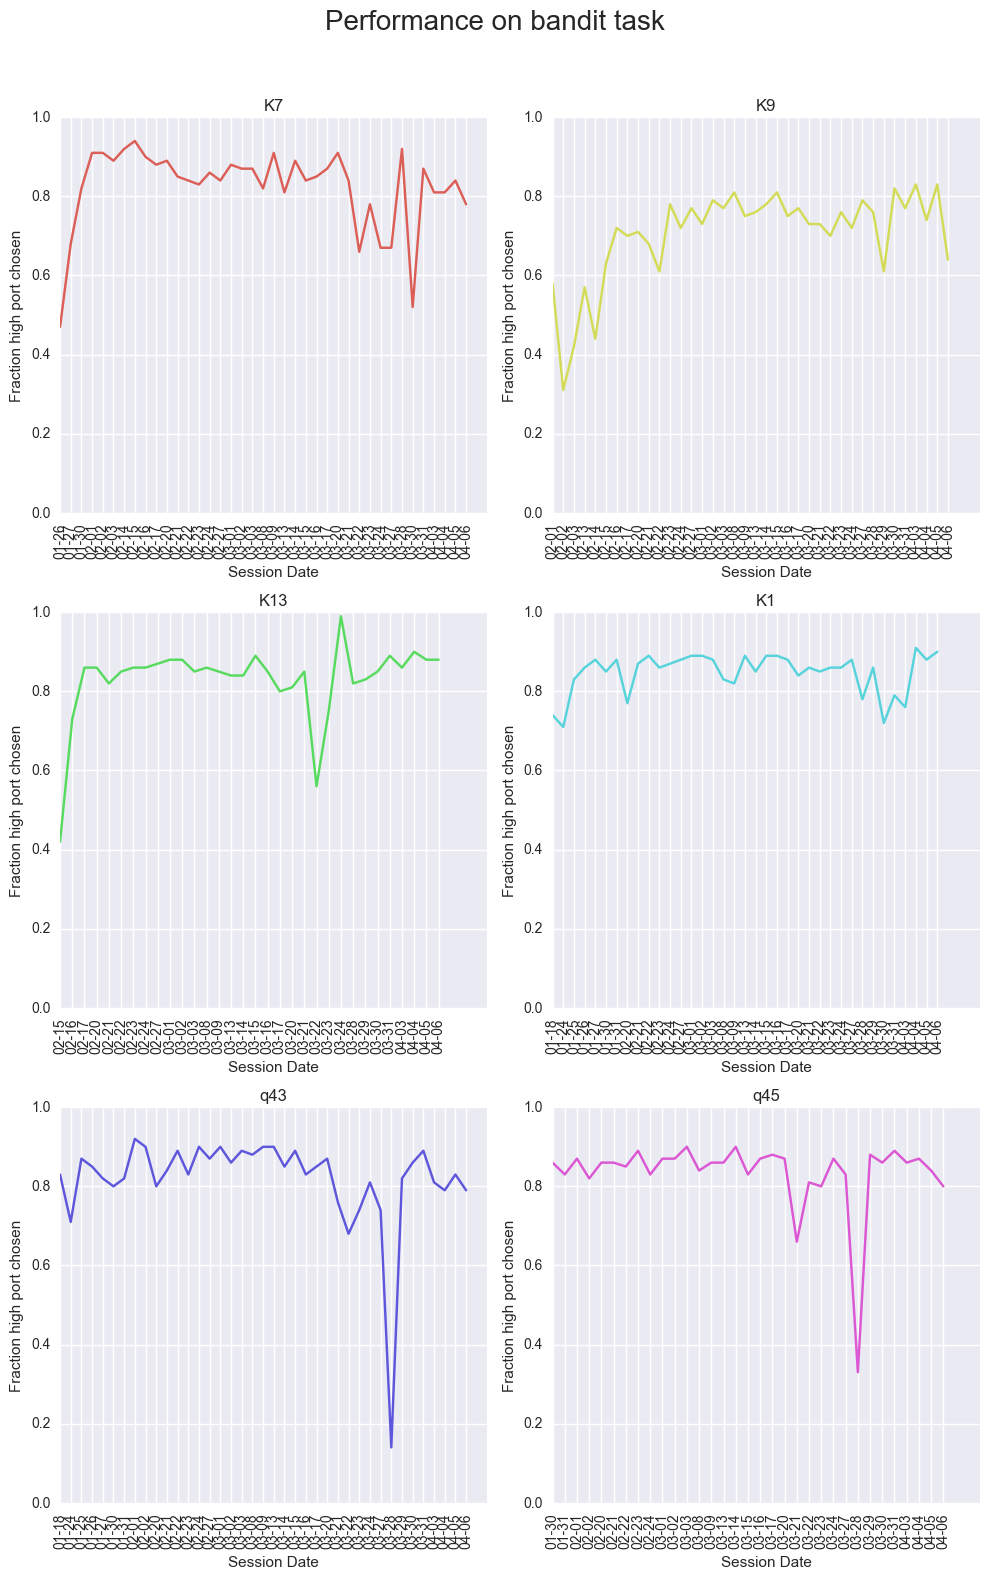

In [23]:
colorz = sns.color_palette('hls',n_colors=6)
fig = plt.figure(figsize=(10,15))
plt.suptitle('Performance on bandit task',x=0.5,y=1.05,fontsize=20)

for i,mouse in enumerate(mice):
    
    #extract the dates
    dates = []
    for date in mouse['Date'].values:
        dates.append(str(date))
    
    plt.subplot(3,2,i+1)
    plt.title(mouse['Mouse ID'].values[0])
    plt.plot(range(mouse.shape[0]),mouse['p(high Port)'].values,color=colorz[i],label=mouse['Mouse ID'].values[0])
    plt.xticks(range(mouse.shape[0]),[date[5:-9] for date in mouse['Date'].values],rotation=90)
    plt.ylim(0,1)
    plt.xlabel('Session Date')
    plt.ylabel('Fraction high port chosen')
    plt.ylim(0,1.0)

plt.tight_layout()

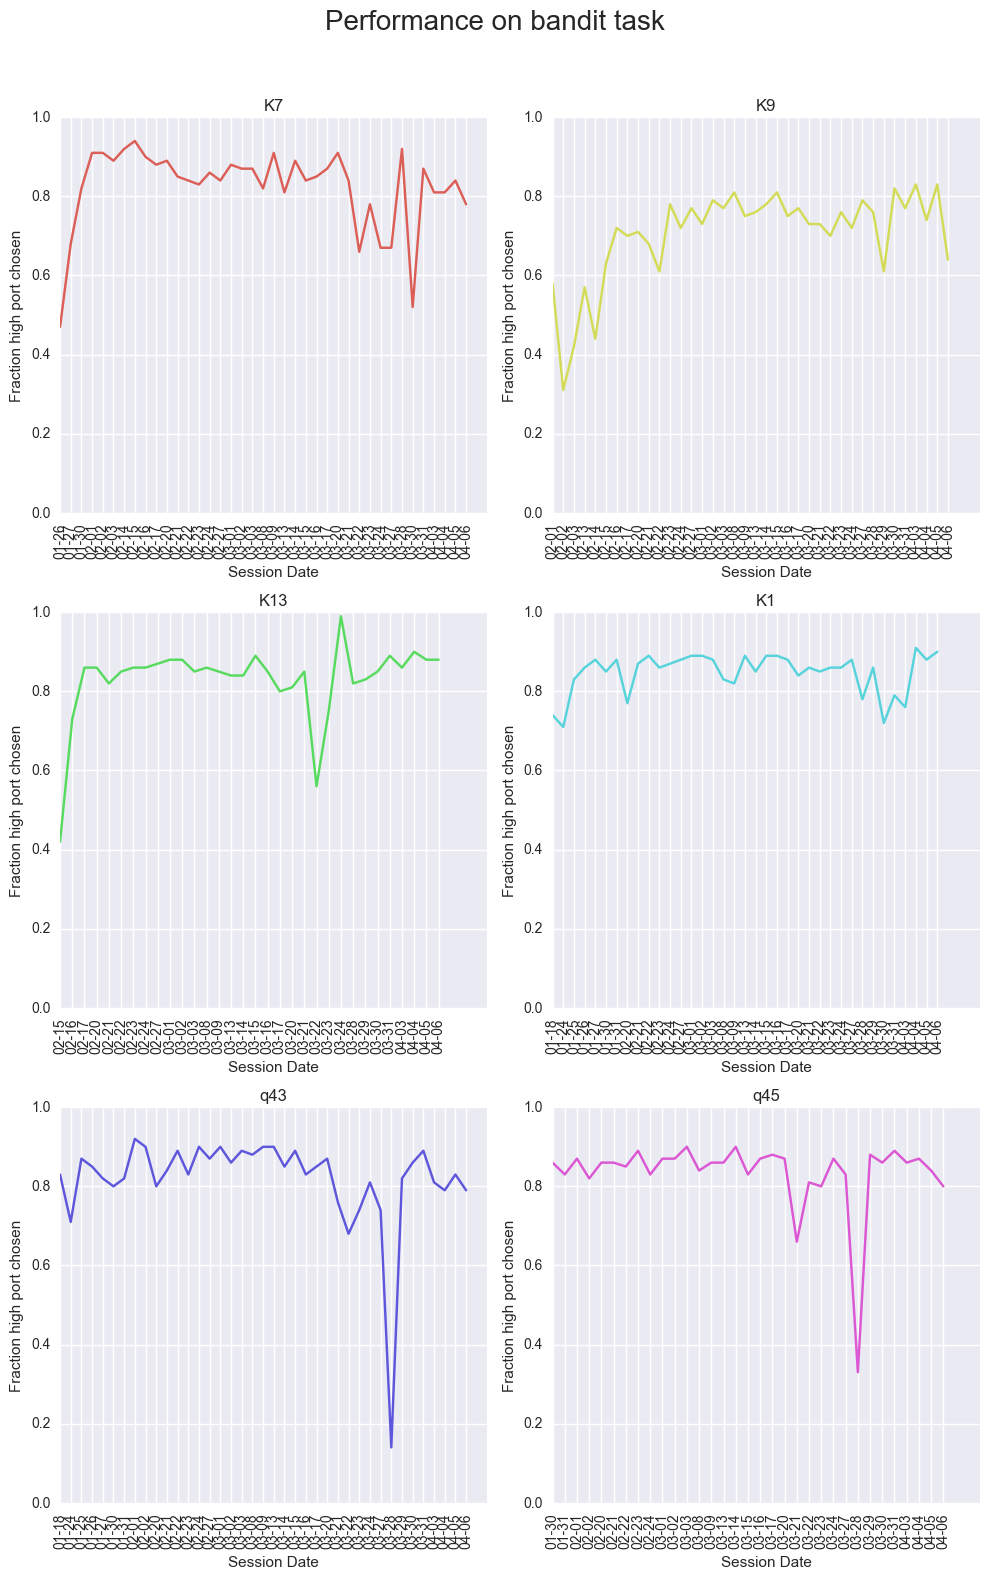

In [25]:
mice = ['K7','K13']
colorz = sns.color_palette('hls',n_colors=6)
fig = plt.figure(figsize=(10,15))
plt.suptitle('Performance on bandit task',x=0.5,y=1.05,fontsize=20)

for i,mouse in enumerate(mice):
    
    plt.subplot(3,2,i+1)
    plt.title(mouse['Mouse ID'].values[0])
    plt.plot(range(mouse.shape[0]),mouse['p(high Port)'].values,color=colorz[i],label=mouse['Mouse ID'].values[0])
    plt.xticks(range(mouse.shape[0]),[date[5:-9] for date in mouse['Date'].values],rotation=90)
    plt.ylim(0,1)
    plt.xlabel('Session Date')
    plt.ylabel('Fraction high port chosen')
    plt.ylim(0,1.0)

plt.tight_layout()

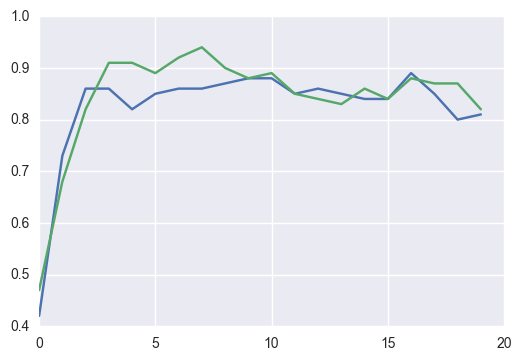

In [42]:
#plt.plot(q43_['p(high Port)'].values[:20])
#plt.plot(q45_['p(high Port)'].values[:20])
plt.plot(K13['p(high Port)'].values[:20])
plt.plot(K7['p(high Port)'].values[:20])
#plt.plot(K11['p(high Port)'].values[:20])

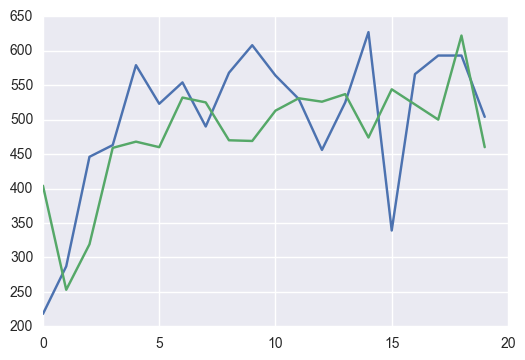

In [44]:
plt.plot(K13['No. Trials'].values[:20])
plt.plot(K7['No. Trials'].values[:20])

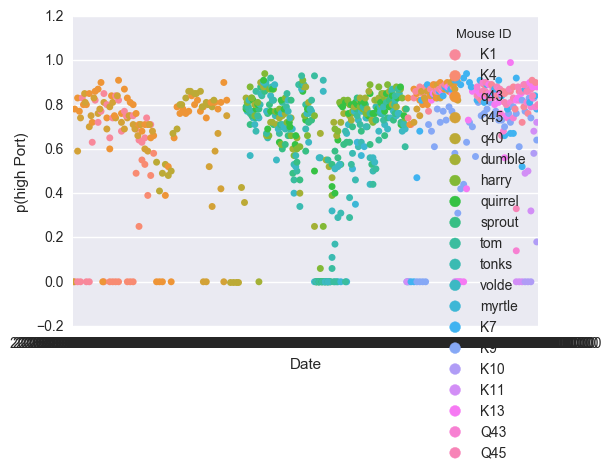

In [53]:
sns.swarmplot(x = 'Date',y='p(high Port)',data=record,hue='Mouse ID')

In [60]:
record[((record['Mouse ID'] == 'K1') & ((record['Left Reward Prob'] == 0.9) | (record['Left Reward Prob'] == 0.1)))]['p(high Port)'].values

array([ 0.83,  0.72,  0.77,  0.85,  0.82,  0.74,  0.71,  0.83,  0.86,
        0.88,  0.85,  0.77,  0.87,  0.89,  0.86,  0.87,  0.88,  0.89,
        0.89,  0.88,  0.83,  0.82,  0.89,  0.85,  0.91,  0.88,  0.9 ])

16
K10
K11
K13
K4
K9
Q45
myrtle
q40
volde


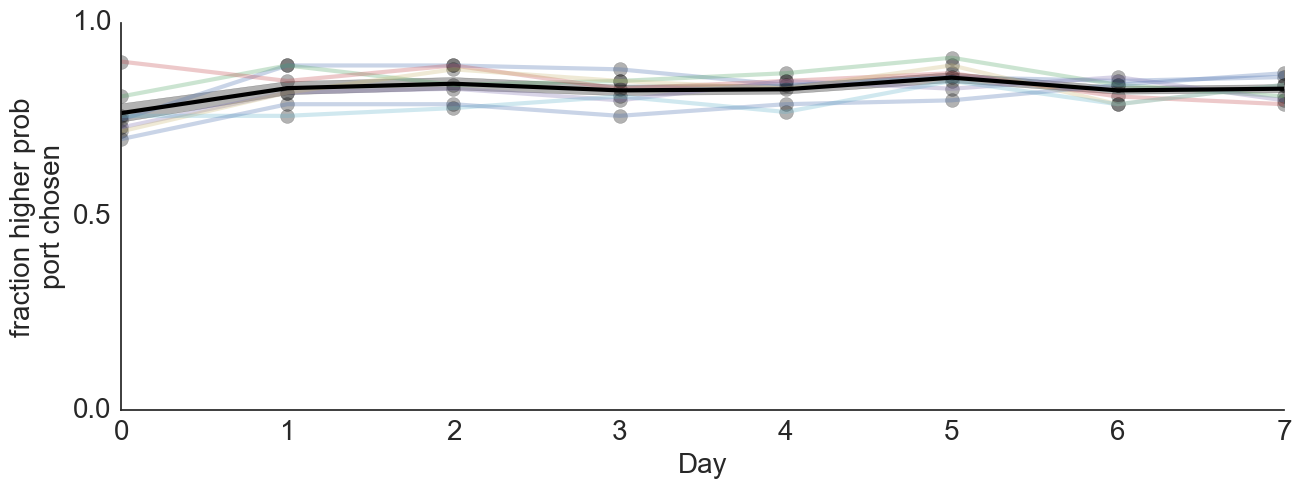

In [157]:
mice = ['K7','K13','Q43','Q45','dumble','harry']
mice = np.unique(record['Mouse ID'].values)
#mice = np.delete(mice,np.where(mice=='dumble'))
#mice = np.delete(mice,np.where(mice=='harry'))
#mice = np.delete(mice,np.where(mice=='K4'))
#mice = np.delete(mice,np.where(mice=='K10'))
#mice = np.delete(mice,np.where(mice=='K11'))
mice = np.delete(mice,np.where(mice=='q45'))
mice = np.delete(mice,np.where(mice=='q43'))
#mice = np.delete(mice,np.where(mice=='quirrel'))
mice = np.delete(mice,np.where(mice=='sprout'))
mice = np.delete(mice,np.where(mice=='tom'))
#mice = np.delete(mice,np.where(mice=='tonks'))
#mice = np.delete(mice,np.where(mice=='volde'))
#mice = np.delete(mice,np.where(mice=='K9'))
#mice = np.delete(mice,np.where(mice=='K7'))
#mice = np.delete(mice,np.where(mice=='myrtle'))

print(mice.shape[0])
sns.set_style('white')
plt.figure(figsize=(15,5))
y = np.zeros((mice.shape[0]-9,10))
x = np.arange(0,10)
k = 0 
for i,mouse in enumerate(mice):
    y_temp = record[((record['Mouse ID'] == mouse) & ((record['Left Reward Prob'] == 0.8) | (record['Left Reward Prob'] == 0.2)))]['p(high Port)'].values
    try:
        y[k,:] = y_temp[-10:]
        plt.plot(x,y[k,:],label=mouse,alpha=0.3,linewidth=3)
        plt.scatter(x,y[k,:],label=mouse,alpha=0.3,s=100,color='black')
        k+=1
    except:
        print(mouse)

plt.plot(x,y.mean(axis=0),color='black',linewidth=3)
err = y.std(axis=0)/np.sqrt(7)
plt.fill_between(x,y1=y.mean(axis=0)+err,y2=y.mean(axis=0)-err,color='black',alpha=0.3)
plt.ylim(0,1)
plt.xlim(0,7)
plt.xticks(fontsize=20)
plt.yticks([0,0.5,1],fontsize=20)
plt.xlabel('Day',fontsize=20)
plt.ylabel('fraction higher prob\nport chosen',fontsize=20)
#plt.legend(loc='best')
sns.despine(top='True')

In [117]:
y+y.std(axis=0)

array([[ 0.86193268,  0.99320484,  0.9810998 ,  0.91914373,  0.90229761,
         0.91920967,  0.89880387,  0.90285281,  0.89776832,  0.93564052],
       [ 0.92193268,  0.99320484,  0.9310998 ,  0.88914373,  0.93229761,
         0.96920967,  0.88880387,  0.85285281,  0.87776832,  0.83564052],
       [ 1.01193268,  0.95320484,  0.9810998 ,  0.86914373,  0.91229761,
         0.92920967,  0.85880387,  0.83285281,  0.86776832,  0.84564052],
       [ 0.84193268,  0.92320484,  0.9210998 ,  0.83914373,  0.91229761,
         0.88920967,  0.90880387,  0.84285281,  0.82776832,  0.92564052],
       [ 0.83193268,  0.92320484,  0.9710998 ,  0.88914373,  0.89229761,
         0.94920967,  0.83880387,  0.88285281,  0.91776832,  0.92564052],
       [ 0.96193268,  0.84320484,  0.6910998 ,  0.87914373,  0.81229761,
         0.81920967,  0.91880387,  0.87285281,  0.84776832,  0.85564052],
       [ 0.81193268,  0.79320484,  0.8810998 ,  0.84914373,  0.80229761,
         0.77920967,  0.73880387,  0.78285281

In [110]:
y.mean(axis=0)

array([ 0.44  ,  0.4515,  0.469 ,  0.486 ,  0.4695,  0.4865,  0.488 ,
        0.484 ,  0.488 ,  0.491 ])

In [113]:
y

array([[ 0.75,  0.89,  0.89,  0.88,  0.84,  0.86,  0.85,  0.86,  0.86,
         0.88],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.81,  0.89,  0.84,  0.85,  0.87,  0.91,  0.84,  0.81,  0.84,
         0.78],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.9 ,  0.85,  0.89,  0.83,  0.85,  0.87,  0.81,  0.79,  0.83,
         0.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.73,  0.82,  0.83,  0.8 ,  0.85,  0.83,  0.86,  0.8 ,  0.79,
         0.87],
       [ 0.72,  0.82,  0.88,  0.85,  0.83,  0.89,  0.79,  0.84,  0.88,
         0.87]])